<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [16]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores_csv = '../../../../../resource-datasets/sat_scores/sat_scores.csv'

sat_scores_csv

'../../../../../resource-datasets/sat_scores/sat_scores.csv'

In [3]:
# load csv file and apply standard formating 

raw_pd = ''

sat_file = 'sat_scores.csv'

with open(sat_file, 'r') as f:
    raw_pd = f.readlines()
    
lines = [line.replace('"','').replace('\n','') for line in raw_pd]

y = [line.split(',') for line in lines]



In [14]:
# loading variables and values in a dictionary 

sat_scores ={y[0][z]:[y[i][z] for i in range(len(y))][1:] for z,v in enumerate(y[0]) }

sat_scores['State'][:3]

['CT', 'NJ', 'MA']

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [17]:
# creating two pd dataframes using SAT dict & read_csv and comparing value types.

py_dict = pd.DataFrame(sat_scores)
py_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [18]:
pd_sat_scores = pd.read_csv(sat_file)

pd_sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
pd_sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [20]:
# Rate has a different scale than Verbal & Math
# Verbal and Math values are pretty close 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
data_dict = {'Variables':list(pd_sat_scores.columns),
            'Variables type':[pd_sat_scores.dtypes],
            'Dataset shape':pd_sat_scores.shape}

data_dict

{'Variables': ['State', 'Rate', 'Verbal', 'Math'],
 'Variables type': [State     object
  Rate       int64
  Verbal     int64
  Math       int64
  dtype: object],
 'Dataset shape': (52, 4)}

In [9]:
pd_sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

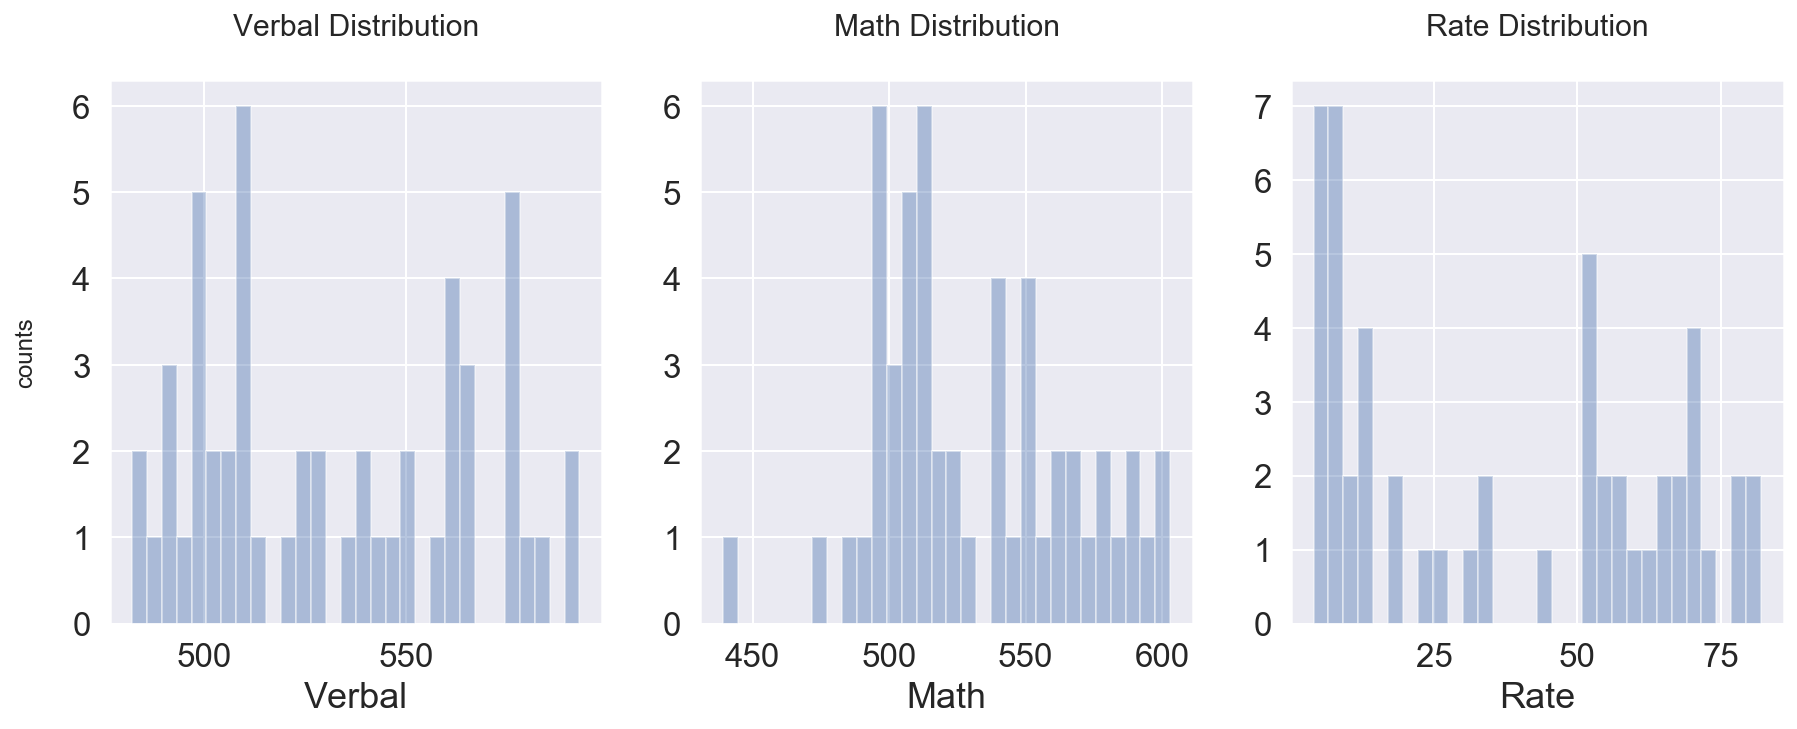

In [11]:
# Multi-plot
fig, ax = plt.subplots(ncols=3, nrows = 1, figsize=(15,5))

sns.distplot(pd_sat_scores.Verbal, bins=30, kde=False, ax=ax[0])
ax[0].set_title('Verbal Distribution\n', fontsize=15)
ax[0].set_ylabel('counts\n', fontsize=12)
   
sns.distplot(pd_sat_scores.Math, bins=30, kde=False, ax=ax[1])
ax[1].set_title('Math Distribution\n', fontsize=15)

sns.distplot(pd_sat_scores.Rate, bins=30, kde=False, ax=ax[2])
ax[2].set_title('Rate Distribution\n', fontsize=15)

plt.show()


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

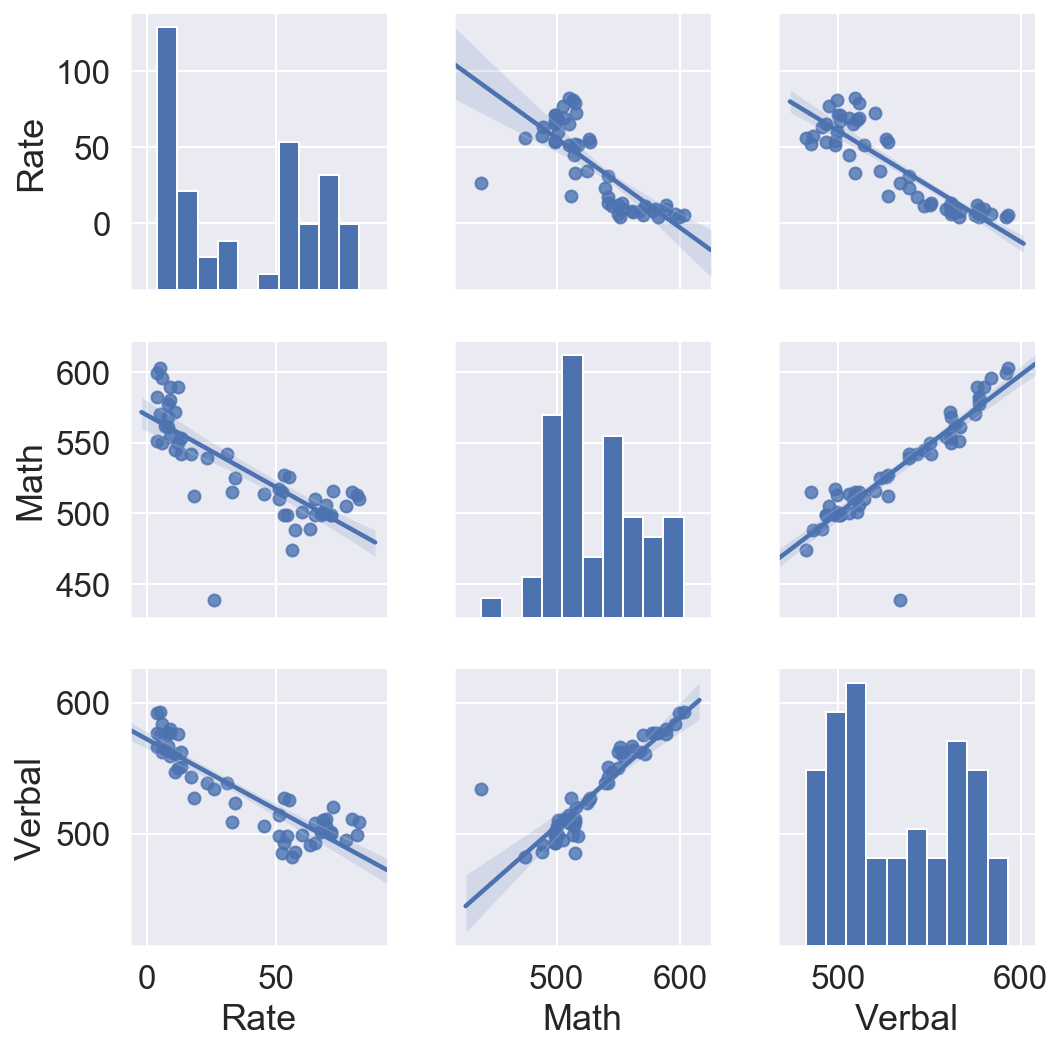

In [12]:
fig = sns.pairplot(pd_sat_scores,vars=['Rate','Math','Verbal'],kind='reg')

In [13]:
# Distributions not normally distibuted
# Rate variable seems negatively correlated to Math and Verbal scores
# Math and Verbal scores are positively correlated

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

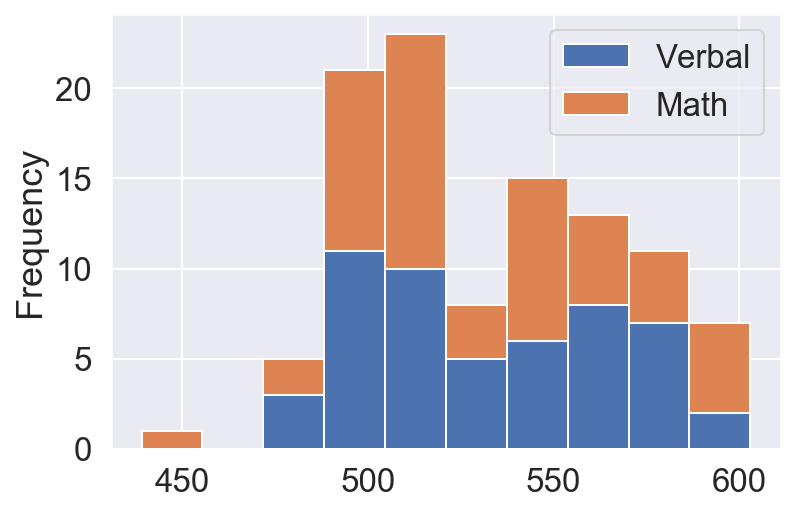

In [14]:
fig = pd_sat_scores[['Verbal','Math']].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

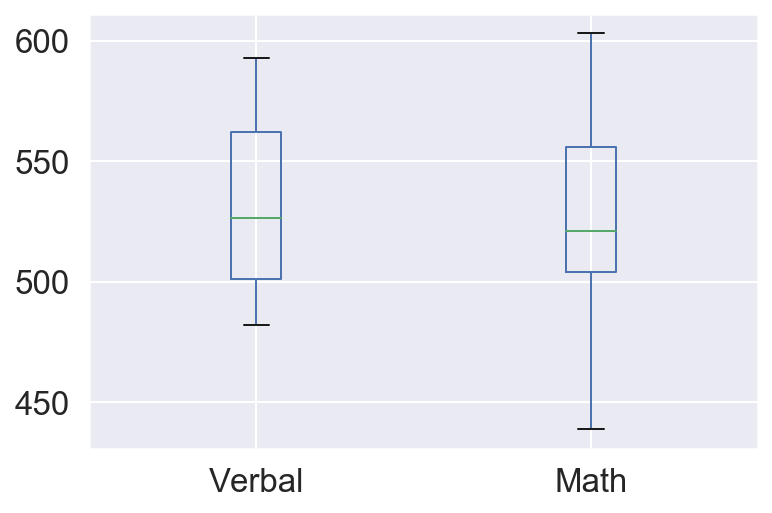

In [15]:
fig = pd_sat_scores[['Verbal','Math']].plot.box()

In [16]:
# Boxplot provides a simple summary of result distribution that can be easily compared to other distributions
# Outliers are easy to spot

# Rate has a different scale


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [17]:
# Adjusting scale of all variables through standardization 

rate_std = (pd_sat_scores['Rate'] - pd_sat_scores['Rate'].mean())/pd_sat_scores['Rate'].std()
math_std = (pd_sat_scores['Math'] - pd_sat_scores['Math'].mean())/pd_sat_scores['Math'].std()
verbal_std = (pd_sat_scores['Verbal'] - pd_sat_scores['Verbal'].mean())/pd_sat_scores['Verbal'].std()

df = pd.concat([rate_std,math_std,verbal_std],axis=1)


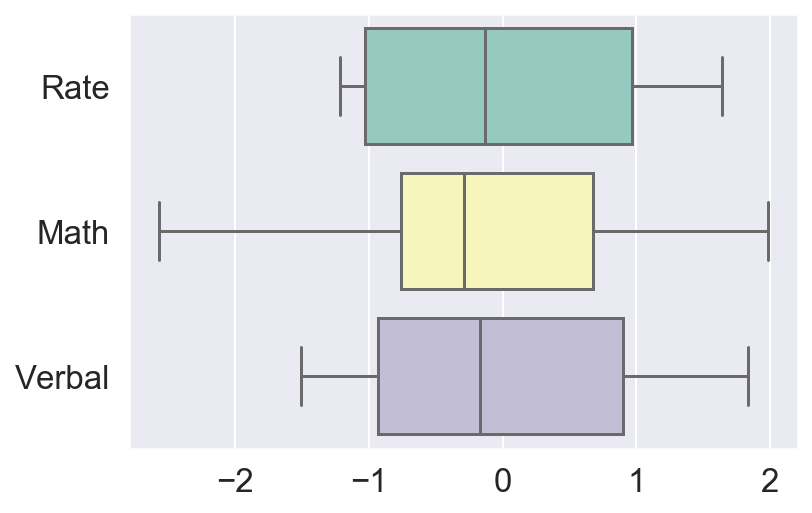

In [18]:
# Plotting standardised variables in a boxplot

fig = sns.boxplot(data=df,palette="Set3",orient='h')

plt.show()

In [21]:
# Boxplot used to get a more detailed overview of the distributions 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
pd_sat_scores[(pd_sat_scores.Verbal > pd_sat_scores.Verbal.mean())][['State']].count()

#24 states are above the Verbal mean

State    24
dtype: int64

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
pd_sat_scores[(pd_sat_scores.Verbal > pd_sat_scores.Verbal.median())][['State']].count()

# 26 states are above the Verbal Median

State    26
dtype: int64

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
pd_sat_scores['diff'] = pd_sat_scores['Verbal'] - pd_sat_scores['Math']

pd_sat_scores.head()

,State,Rate,Verbal,Math,diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
# New DF for the top 10 stated with a greater gab between Verbal and Math

df1 = pd_sat_scores[pd_sat_scores.Verbal > pd_sat_scores.Math].sort_values(by='diff',ascending=False).head(10)
df1 = df1[['State']]

df1

,State
27,OH
29,WV
50,MS
45,AR
31,TN
9,VA
32,NM
16,DC
41,OK
8,ME


In [27]:
# New DF for the top 10 stated with a greater gab between Math and Verbal

df2 = pd_sat_scores[pd_sat_scores.Verbal < pd_sat_scores.Math].sort_values(by='diff',ascending=False).head(10)
df2 = df2[['State']]

df2

,State
0,CT
18,FL
14,IN
15,SC
24,AZ
11,MD
38,KS
26,CO
2,MA
48,SD


In [28]:
print(df1.head(3))
print(df2.head(3))

   State
27    OH
29    WV
50    MS
   State
0     CT
18    FL
14    IN


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [25]:
pd_sat_scores[['Rate', 'Verbal','Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


In [26]:
# Verbal and Math scores are positively correlated 
# Rate is negatively correlated to both scores

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
pd_sat_scores.describe()

,Rate,Verbal,Math,diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [28]:
# There are 52 non-na values for each column
# The average value is higher for Verbal compared to Math
# The Math values are spread out over a large range
# Math has the lowest minimum value
# 75% of the values are greater than the 25% value
# 50% of the values are below the median and 50% above (50% value being the median)
# 75% of the values are below the 75% value
# The max gives the highest value

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
pd_sat_scores[['Rate', 'Verbal','Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


In [29]:
# The covariance doesn't use standardised data.

# Divid the covariance of these variables by the product of the standard deviations of the same values

# Correlation is standardized and gives the strengh of the relationship in addition to the direction.
# It's not affected by a change of scale

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [31]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

drug_use = pd.read_csv('drug-use-by-age.csv')

drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [32]:
# checking for NA values

drug_use.isna().sum()


age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [33]:
# looking at the data types

drug_use.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [34]:
# '-' spotted, replaced with 0 as linked to use value which equals zero in this instance

drug_use.replace('-','0',inplace=True)


In [35]:
# Range in age replaced with means of range values to enable use in calculation as object type not accepted

drug_use.age.value_counts

<bound method IndexOpsMixin.value_counts of 0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object>

In [36]:
drug_use.age.replace({'22-23':'22.5','24-25':'24.5','26-29':'27.5','30-34':'32','35-49':'42','50-64':'57','65+':'65'},inplace=True)

In [37]:
# Selecting all object type columns to be converted to float 

drug_use.select_dtypes(include=['object'])

,age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,5.0,0,35.5,19.0,24.5,0
1,13,1.0,3.0,0,12.0,41.0,5.0
2,14,5.5,0,2.0,5.0,4.5,24.0
3,15,4.0,9.5,1.0,5.5,3.0,10.5
4,16,7.0,1.0,66.5,3.0,4.0,36.0
5,17,5.0,21.0,64.0,4.0,6.0,48.0
6,18,5.0,10.0,46.0,4.0,7.0,12.0
7,19,5.5,2.0,180.0,3.0,7.5,105.0
8,20,8.0,5.0,45.0,4.0,12.0,12.0
9,21,5.0,17.0,30.0,2.0,13.5,2.0


In [38]:
drug_use = drug_use.astype('float')

drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13.0,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [39]:
# Checking that all types are now floats 

drug_use.dtypes

age                        float64
n                          float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [40]:
# Describing data

drug_use.describe()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,25.617647,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,68.970588,3.394118,8.411765,1.388235,5.794118,6.270588,14.705882,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,15.356726,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,70.153285,2.792506,15.000245,0.927283,4.937291,3.166379,6.935098,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000,0.000000,0.600000,7.000000,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,35.500000,0.600000,3.000000,0.600000,3.000000,3.900000,12.000000,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,50.000000,3.200000,3.000000,1.400000,4.000000,6.200000,12.000000,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,27.500000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,66.500000,5.200000,4.000000,2.000000,5.500000,9.000000,15.000000,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,65.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,280.000000,8.600000,52.000000,3.000000,19.000000,10.000000,36.000000,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [301]:
# Creating a DF with the use, setting 'age' as index and removing -use in column names

usage = drug_use[(drug_use.columns.values[drug_use.columns.str.contains('use')])]

usage_age = pd.concat([usage, drug_use['age']], axis=1, sort=False)


In [90]:
usage_age2=usage_age.set_index('age')
usage_age2.columns = usage_age2.columns.str.replace('-use','')

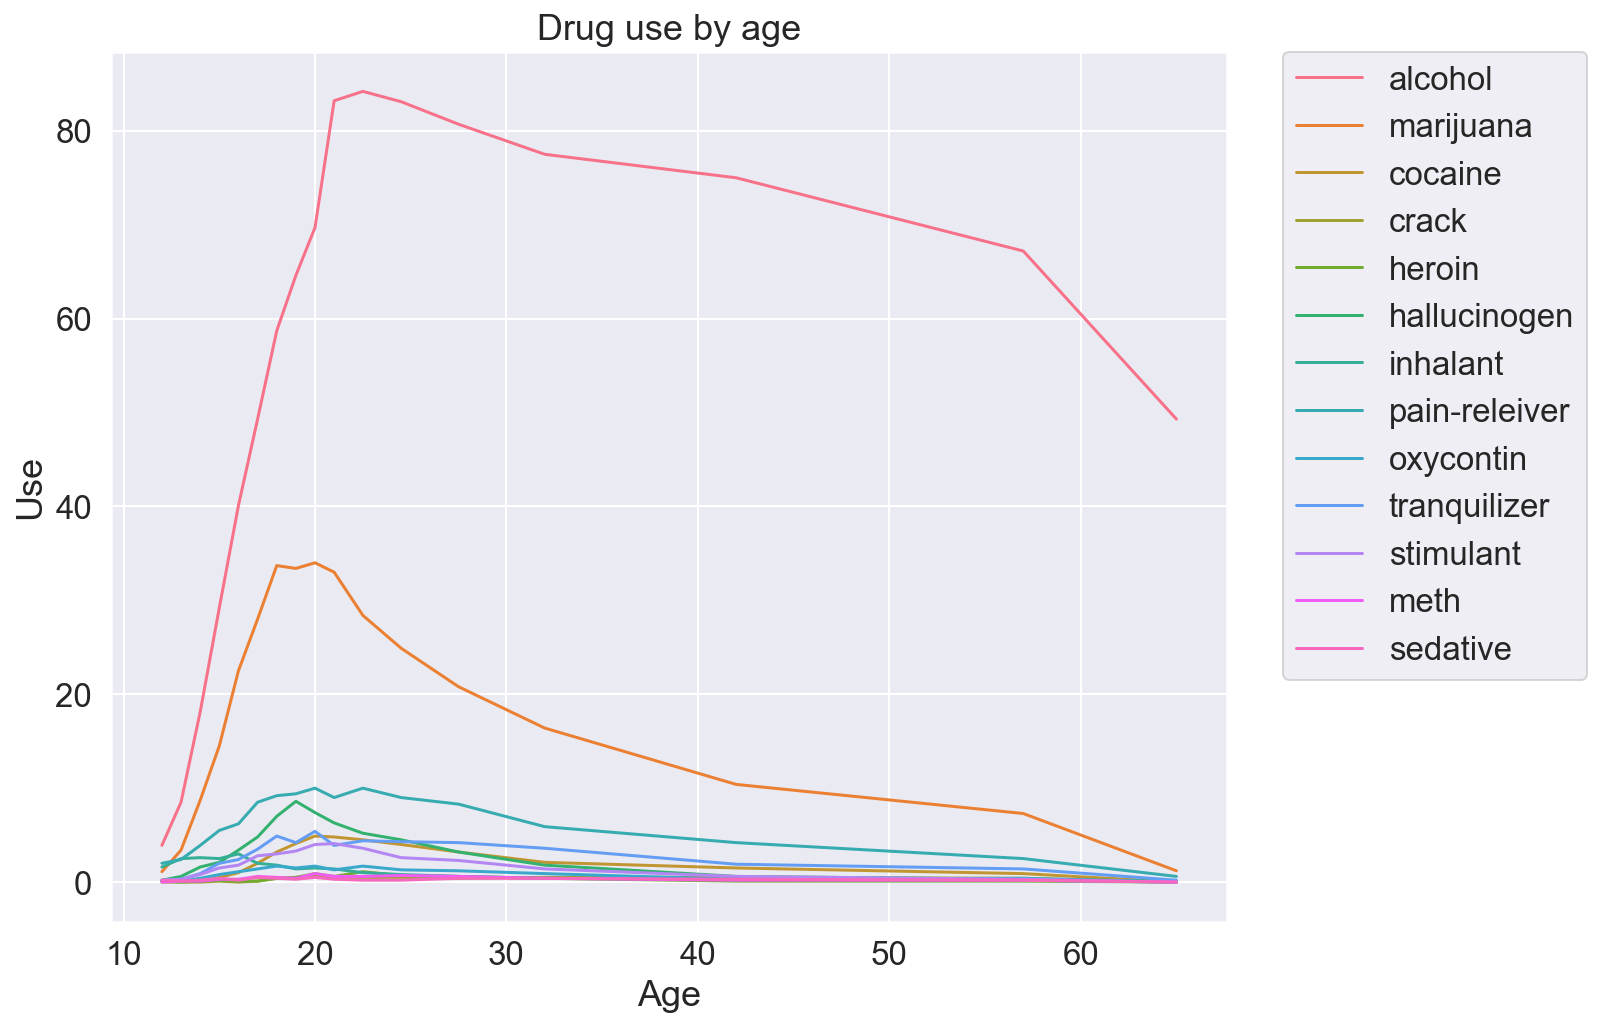

In [300]:
# Plotting use by age

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=usage_age2,dashes=False,ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('Use')
ax.set_xlabel('Age')
ax.set_title('Drug use by age')

plt.show()

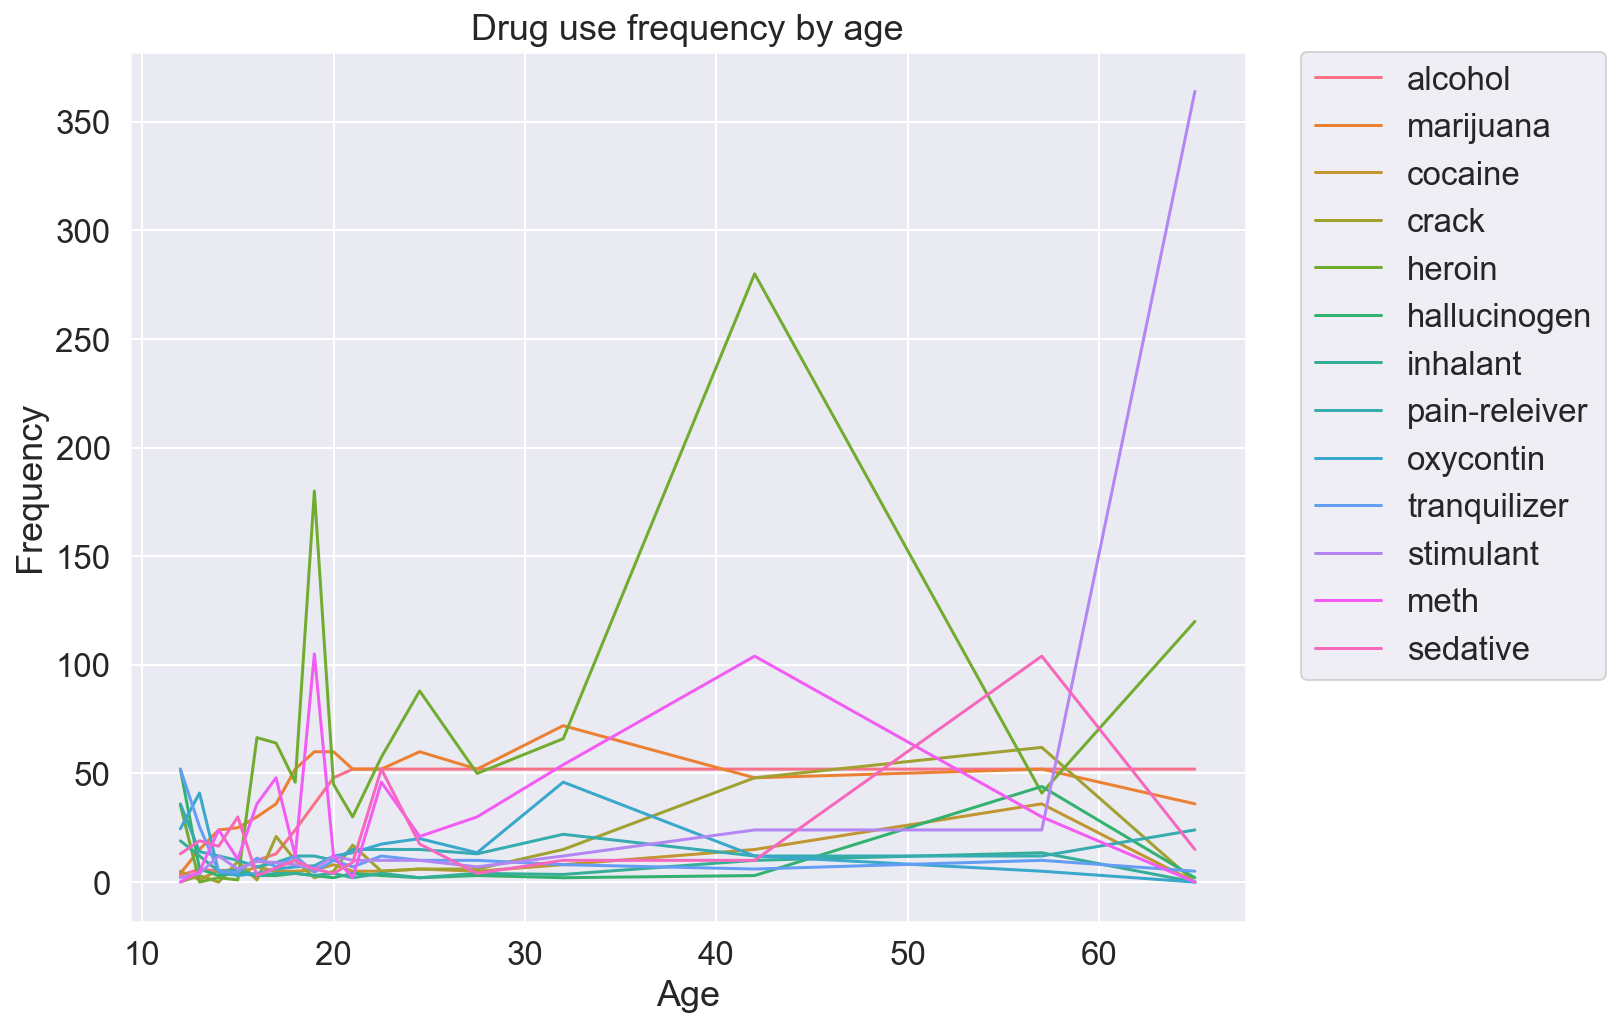

In [259]:
# Plotting frequency by age

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=frequency_age2,dashes=False,ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel('Frequency')
ax.set_xlabel('Age')
ax.set_title('Drug use frequency by age')

plt.show()

In [93]:
usage.mean()

alcohol-use          55.429412
marijuana-use        18.923529
cocaine-use           2.176471
crack-use             0.294118
heroin-use            0.352941
hallucinogen-use      3.394118
inhalant-use          1.388235
pain-releiver-use     6.270588
oxycontin-use         0.935294
tranquilizer-use      2.805882
stimulant-use         1.917647
meth-use              0.382353
sedative-use          0.282353
dtype: float64

In [299]:
# Creating a DF without Alcohol and Marijuana with high values

usage_age2.head()
hard_use = usage_age2.drop(['alcohol','marijuana'],axis=1)


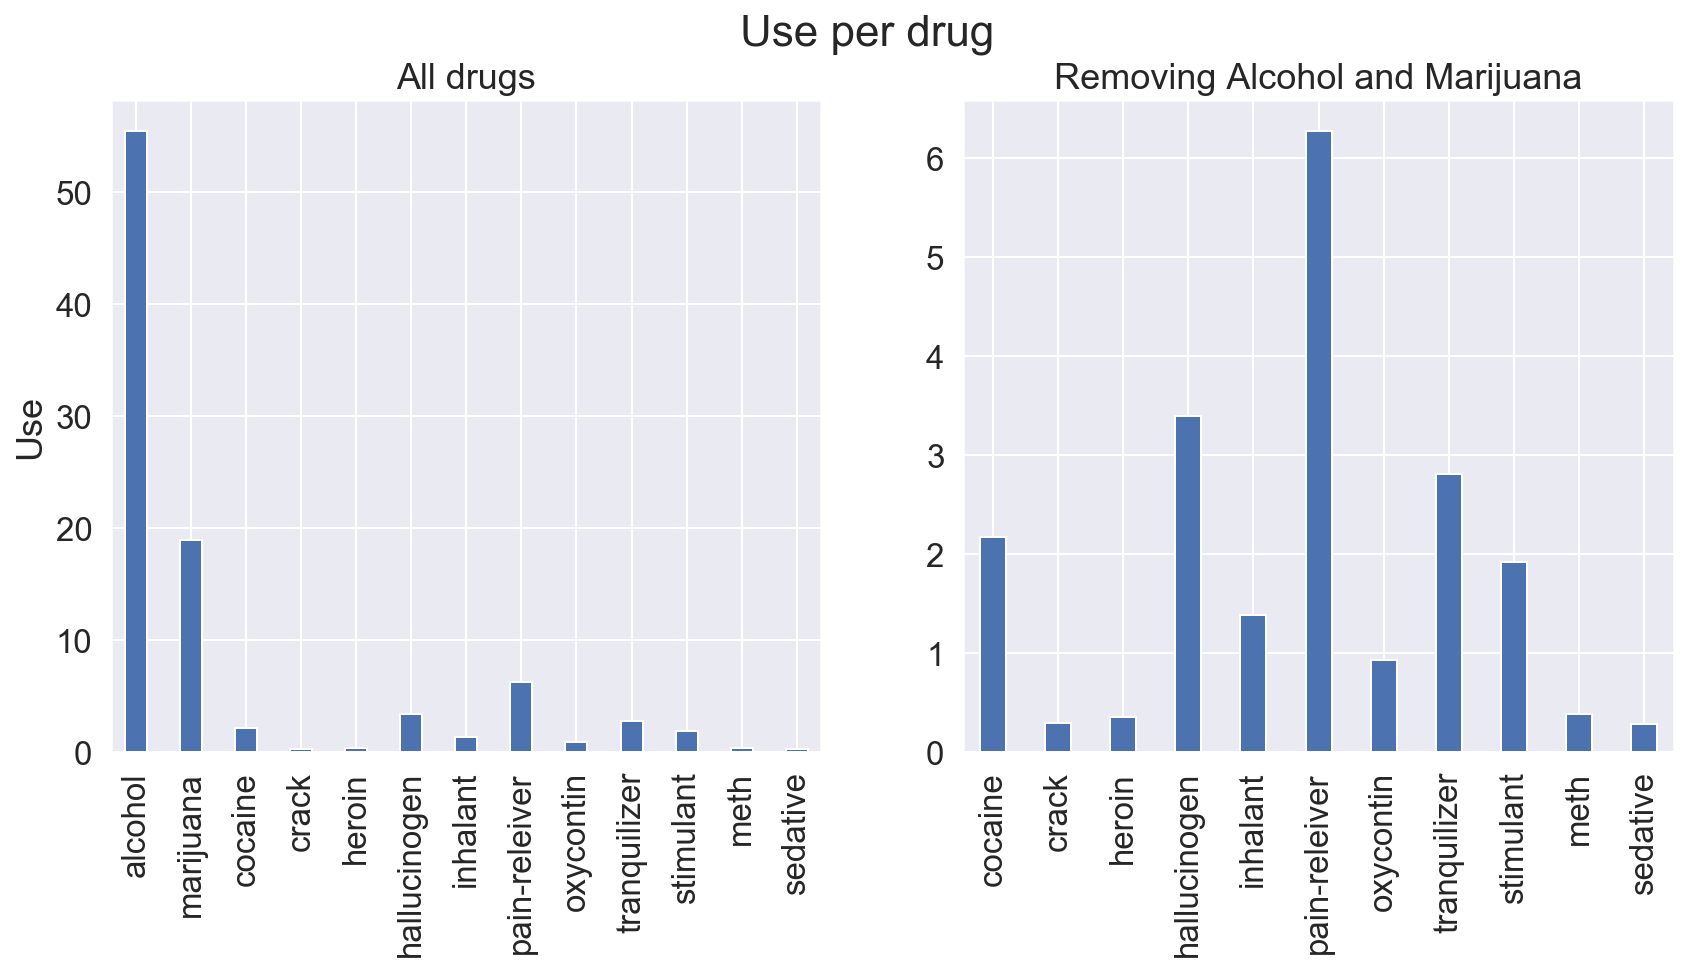

In [298]:
# Plotting use per drug

fig, ax = plt.subplots(1,2,figsize=(14,6))


usage_age2.mean().plot(kind='bar',width=0.4,ax=ax[0])
ax[0].set_title('All drugs')
ax[0].set_ylabel('Use')
plt.xticks(rotation=45)
 
hard_use.mean().plot(kind='bar',width=0.4,ax=ax[1])
ax[1].set_title('Removing Alcohol and Marijuana')
fig.suptitle('Use per drug', fontsize=22)

plt.show()

In [257]:
# Creating new DF for frequency, setting age as index and removing -frequeny in column names

frequency = drug_use[(drug_use.columns.values[drug_use.columns.str.contains('freq')])]

frequency_age = pd.concat([frequency, drug_use['age']], axis=1, sort=False)


In [54]:
frequency_age2=frequency_age.set_index('age')


In [55]:
frequency_age2.columns = frequency_age2.columns.str.replace('-frequency','')

frequency_age2.head()

,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-releiver,oxycontin,tranquilizer,stimulant,meth,sedative
age,,,,,,,,,,,,,
12.0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
13.0,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
14.0,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
15.0,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
16.0,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


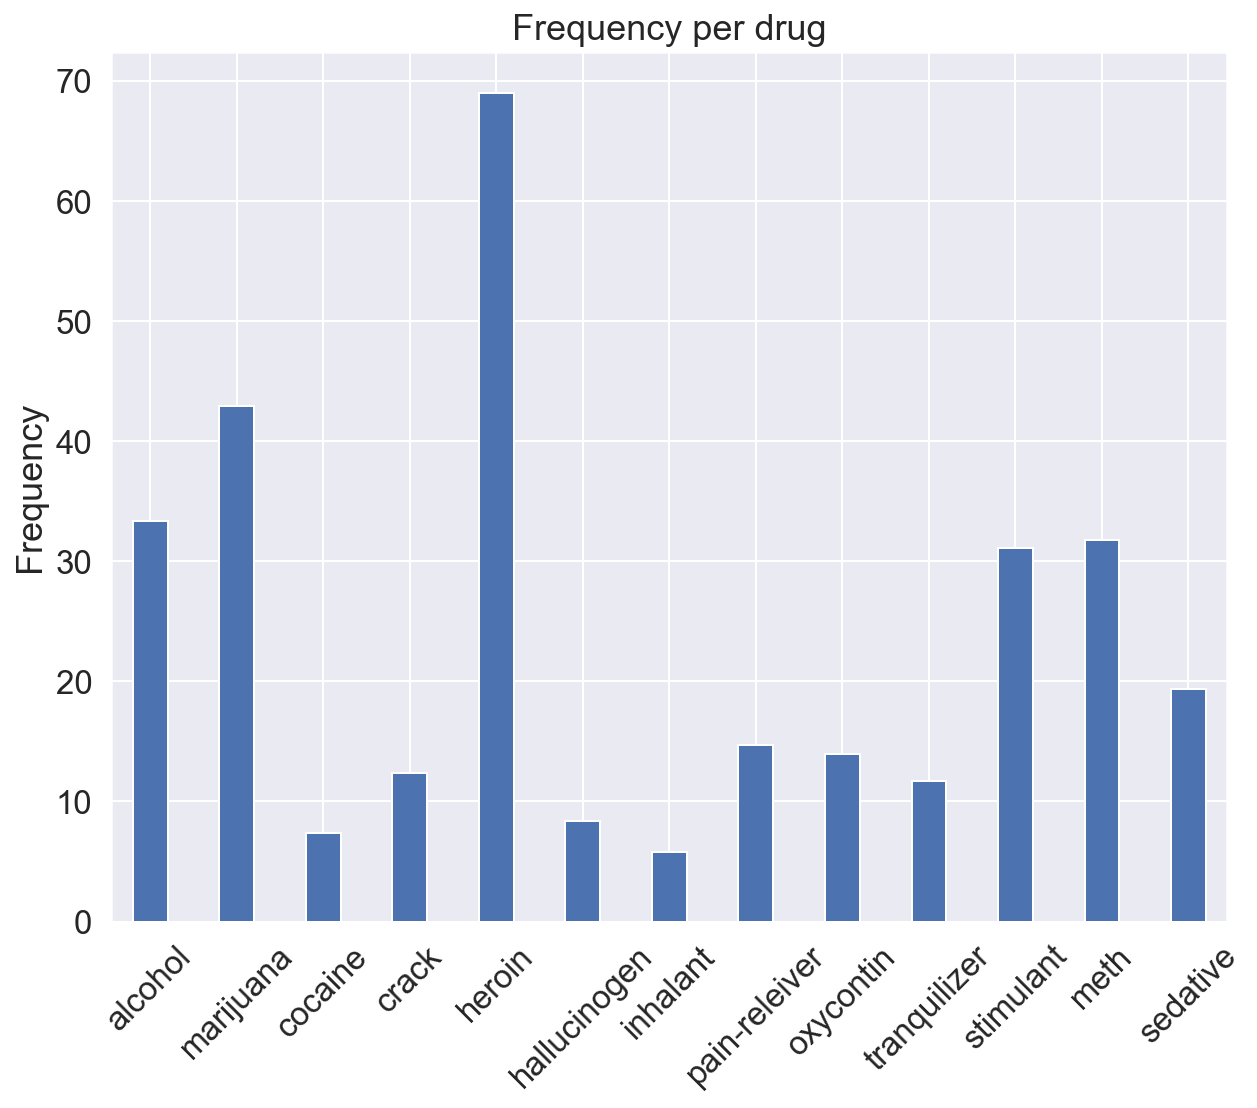

In [56]:
# Plotting frequency per drug

fig, ax = plt.subplots(figsize=(10,8))

frequency_age2.mean().plot(kind='bar',width=0.4)
ax.set_title('Frequency per drug')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Alcohol and marijuana are by far the most used drugs specially among yougsters. Use seems to peak in the 20s and decrease afterwards. Heroin has the highest frequency rate but a low use rate. Use and frequence doesn't seem correlated, the higher the number of users doesn't seems to infer an proportional frequency use even though alcohol and marijuana have a high level of use and frequency.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

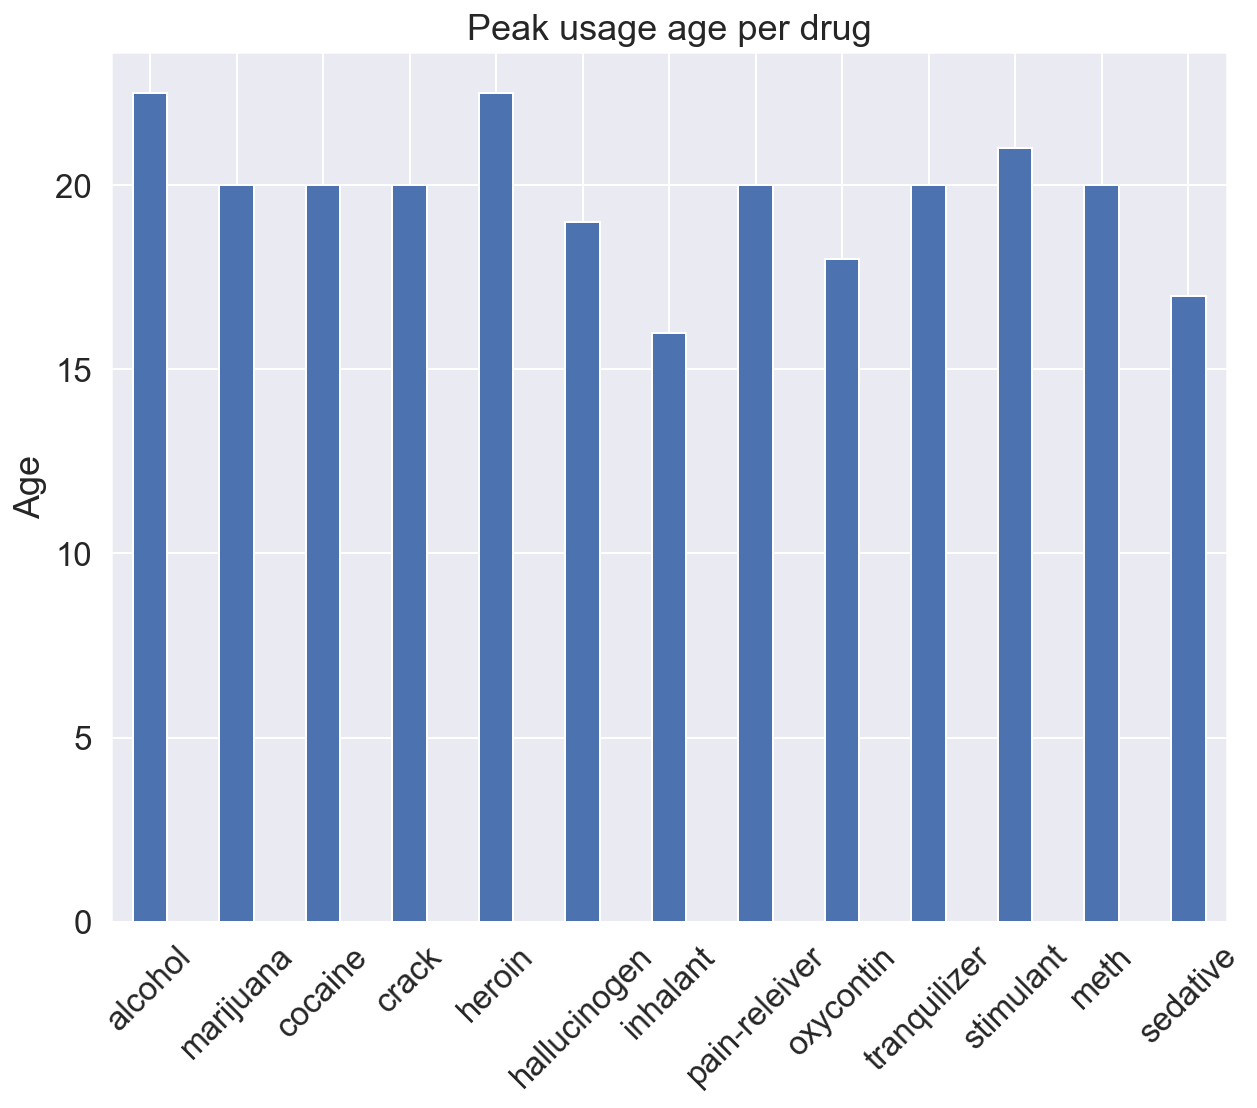

In [237]:
# Plotting max usage value per age 

peak_age = usage_age2.idxmax()

fig, ax = plt.subplots(figsize=(10,8))

peak_age.plot(kind='bar',width=0.4)
ax.set_title('Peak usage age per drug')
ax.set_ylabel('Age')
plt.xticks(rotation=45)
plt.show()


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


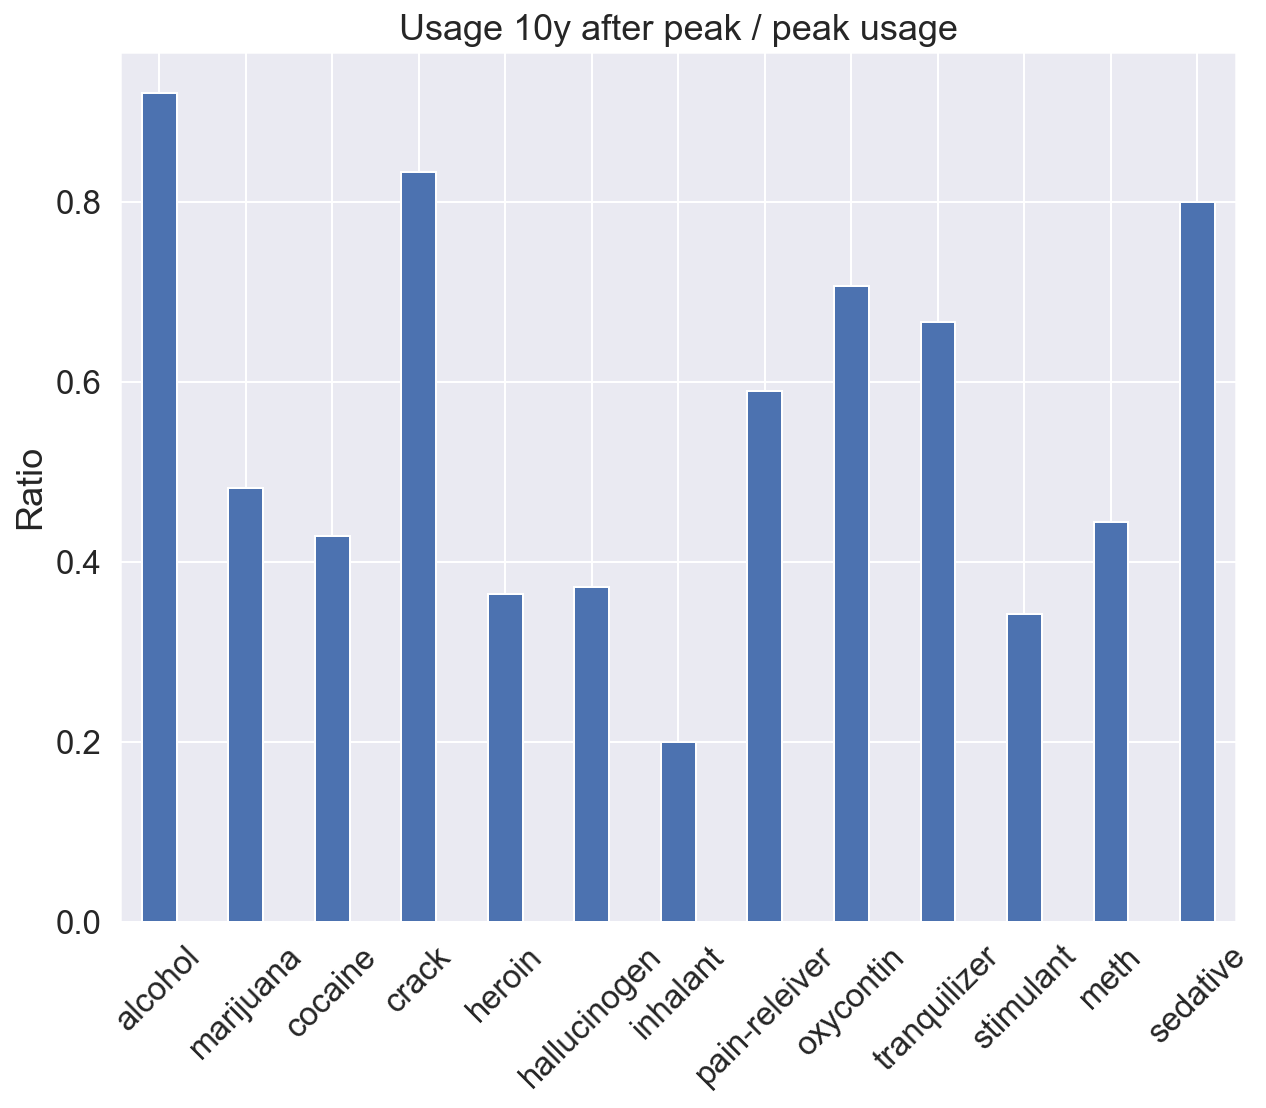

In [251]:
# Plotting the ratio of the 10y usage value after peak value over peak use value to spot trends

peak_age_plus_10 = pd.Series()
rounded_peak_age_plus_10 = pd.Series()
usage_plus_10 = pd.Series()

for drug in usage_age2.columns:
    peak_age_plus_10.set_value(drug,peak_age[drug]+10)
    rounded_peak_age_plus_10.set_value(drug,usage_age2.index[usage_age2.index.get_loc(peak_age_plus_10[drug], method='nearest')])
    usage_plus_10.set_value(drug,usage_age2.loc[rounded_peak_age_plus_10[drug], drug] / usage_age2.max()[drug])

fig, ax = plt.subplots(figsize=(10,8))

usage_plus_10.plot(kind='bar',width=0.4)
ax.set_title('Usage 10y after peak / peak usage')
ax.set_ylabel('Ratio')
plt.xticks(rotation=45)
plt.show()

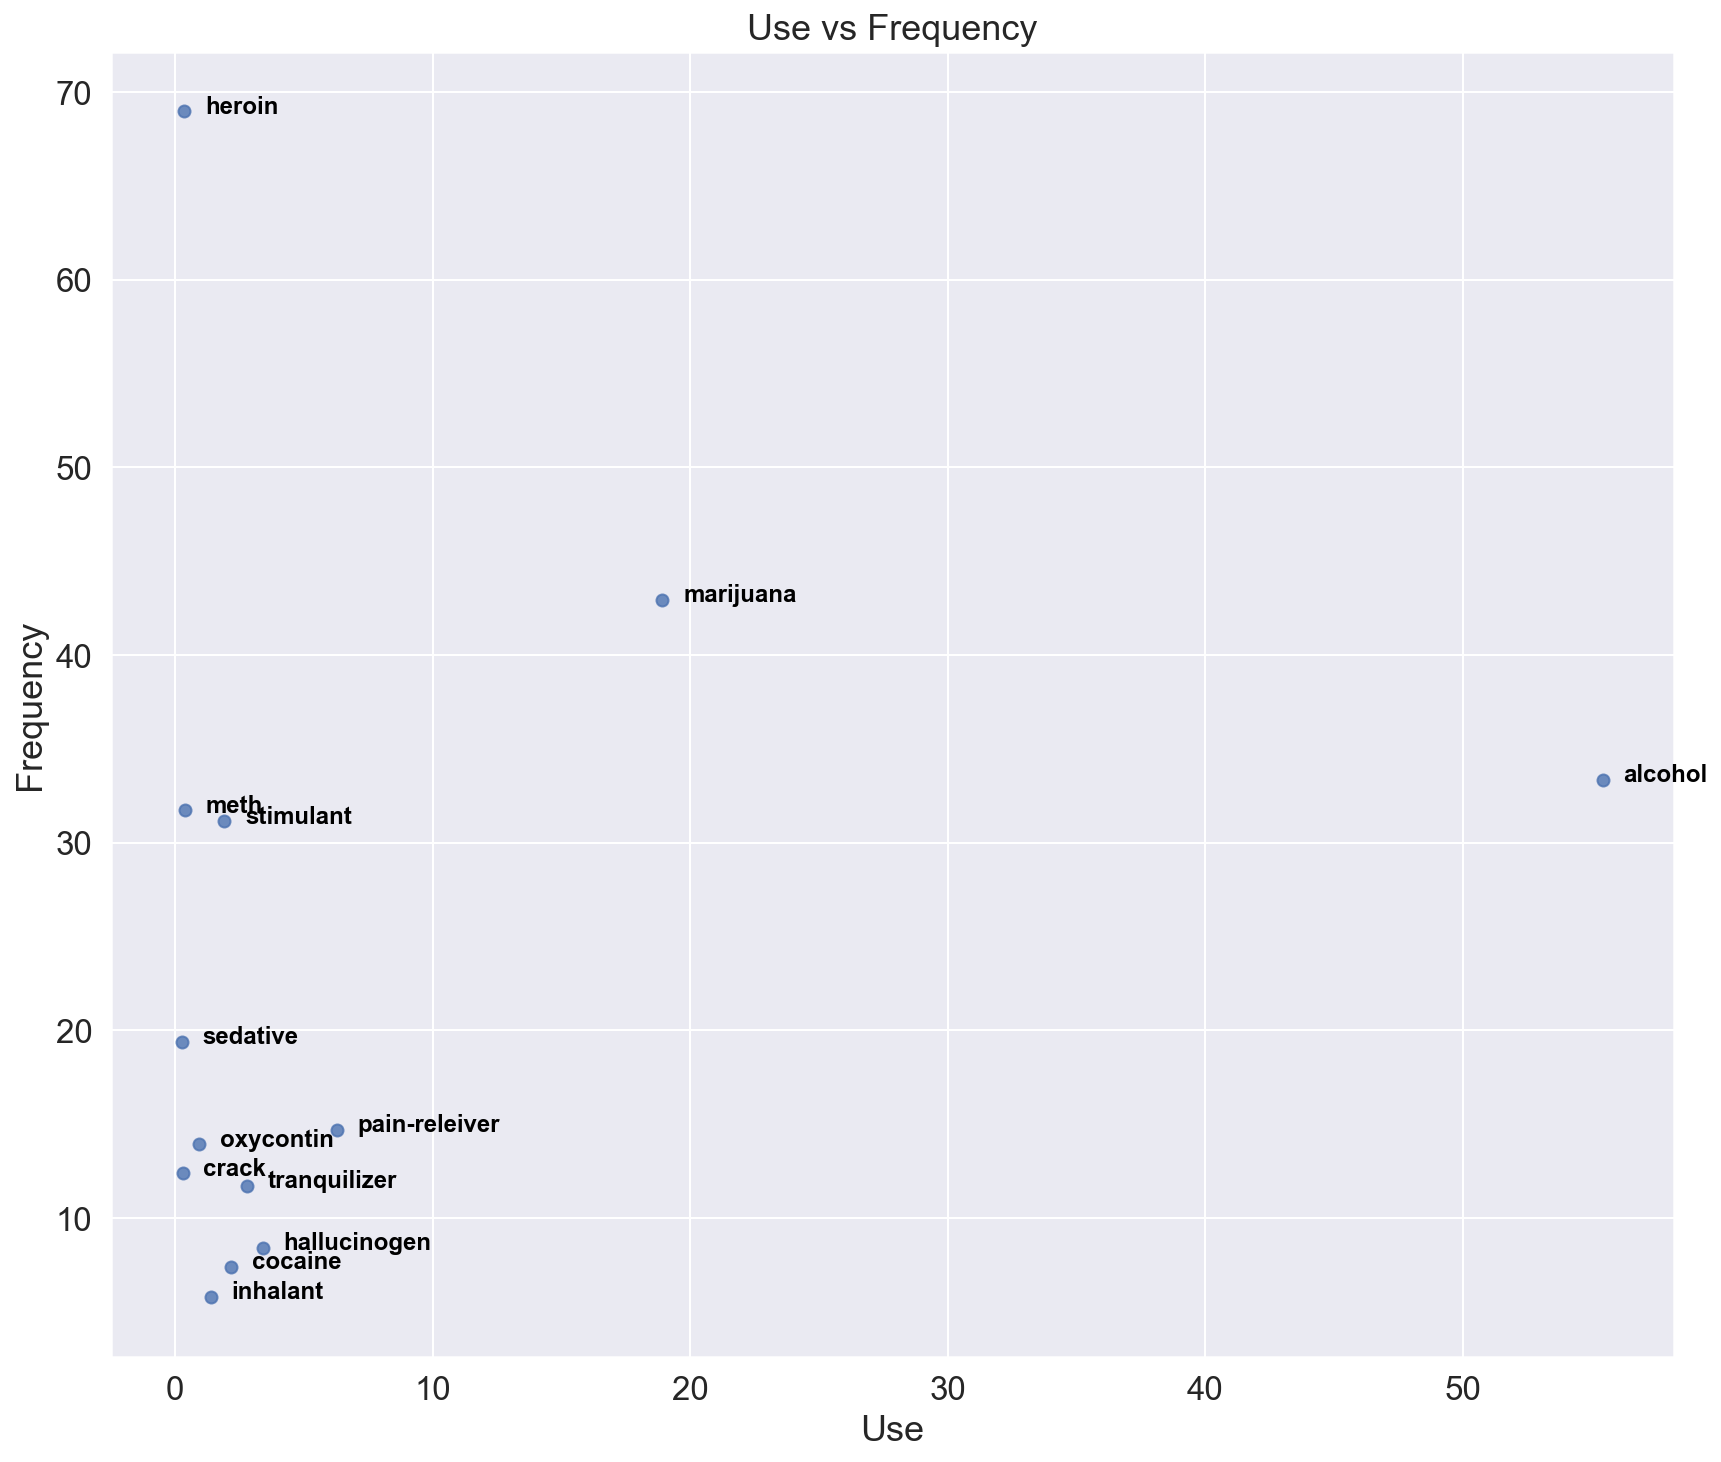

In [256]:
# Plotting the relationship between frequency and use 

fig, ax = plt.subplots(figsize=(14,12))

df_scatter = pd.DataFrame({'x': list(drug_use[(drug_use.columns.values[drug_use.columns.str.contains('use')])].mean()),
                          'y': list(drug_use[(drug_use.columns.values[drug_use.columns.str.contains('freq')])].mean()),
                          'z': list(drug_use.columns[drug_use.columns.str.contains('use')])})

df_scatter.z = df_scatter.z.str.replace('-use','')

df_scatter

ax = sns.regplot(x=df_scatter.x, y=df_scatter.y, fit_reg=False)
ax.set_title('Use vs Frequency')
ax.set_ylabel('Frequency')
ax.set_xlabel('Use')

for line in range(0,df_scatter.shape[0]):
     ax.text(df_scatter.x[line]+0.8, df_scatter.y[line]-0.1, df_scatter.z[line], horizontalalignment='left', size='large', color='black', weight='semibold')

plt.show()

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [68]:
# Higher correlation using Spearman correlation

pd_sat_scores[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


In [69]:
pd_sat_scores[['Verbal','Math']].corr()

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.